In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel('c:Downloads/nptel-DA/CART.xlsx')
data

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [59]:
from sklearn.preprocessing import LabelEncoder
le_age=LabelEncoder()
le_income=LabelEncoder()
le_student=LabelEncoder()
le_credit_rating=LabelEncoder()
le_buys_computer=LabelEncoder()

In [60]:
data['age_n']=le_age.fit_transform(data['age'])
data['income_n']=le_income.fit_transform(data['income'])
data['student_n']=le_student.fit_transform(data['student'])
data['credit_rating_n']=le_credit_rating.fit_transform(data['credit_rating'])
data['buys_computer_n']=le_buys_computer.fit_transform(data['buys_computer'])


In [61]:

data.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [62]:
data.tail(3)

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
11,12,middle_aged,medium,no,excellent,yes,0,2,0,0,1
12,13,middle_aged,high,yes,fair,yes,0,0,1,1,1
13,14,senior,medium,no,excellent,no,1,2,0,0,0


In [63]:
data_new= data.drop(['age','income','student','credit_rating','buys_computer'],axis='columns')
data_new.head()

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1


In [64]:
feature_cols=['age_n','income_n','student_n','credit_rating_n']
x=data_new.drop(['RID','buys_computer_n'],axis='columns')
y=data_new['buys_computer_n']
x.head(),y.head()

(   age_n  income_n  student_n  credit_rating_n
 0      2         0          0                1
 1      2         0          0                0
 2      0         0          0                1
 3      1         2          0                1
 4      1         1          1                1,
 0    0
 1    0
 2    1
 3    1
 4    1
 Name: buys_computer_n, dtype: int32)

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
dt=clf.fit(x,y)
dt

DecisionTreeClassifier()

In [66]:
import sklearn
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [67]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('buys_computer.png')


True

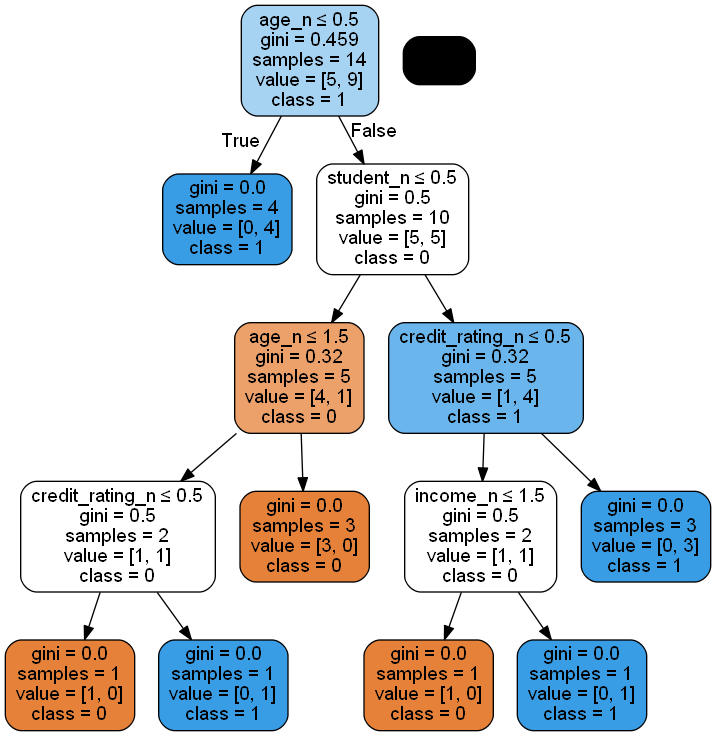

In [68]:
Image(graph.create_png())

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [70]:
clf1=DecisionTreeClassifier(random_state=42)
df=clf1.fit(x_train,y_train)
df

DecisionTreeClassifier(random_state=42)

In [71]:
DecisionTreeClassifier?


In [72]:
from sklearn import metrics
y_pred=clf1.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.75

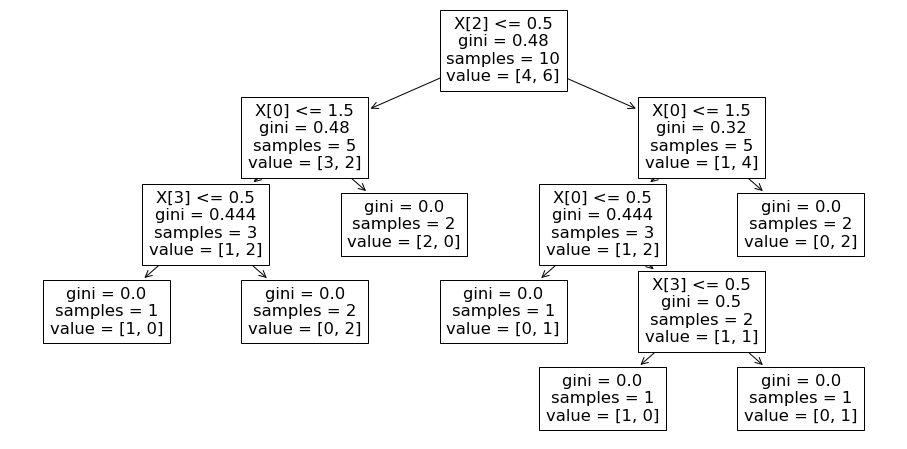

In [73]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf1)
plt.show()

In [74]:
dot_data=StringIO()
export_graphviz(df,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('buys_computer1.png')


True

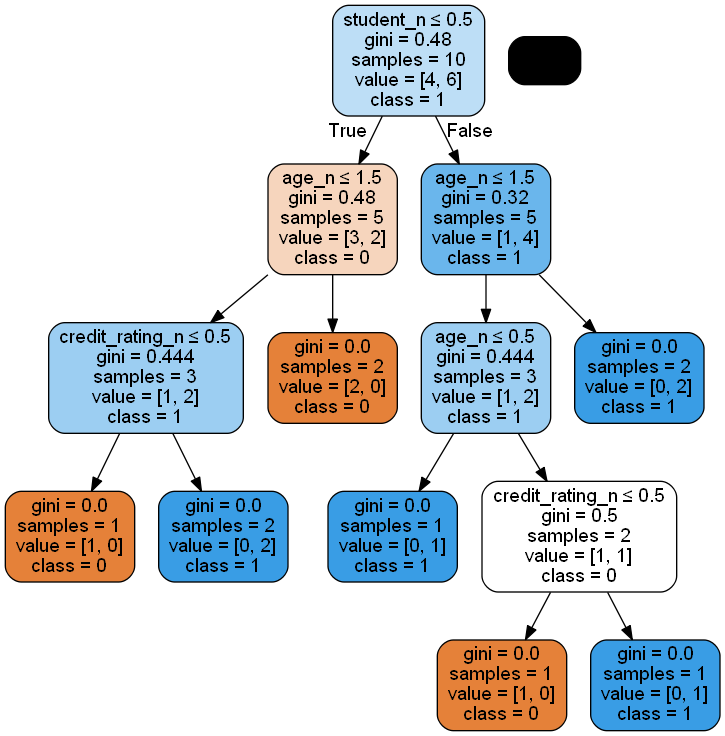

In [75]:
Image(graph.create_png())

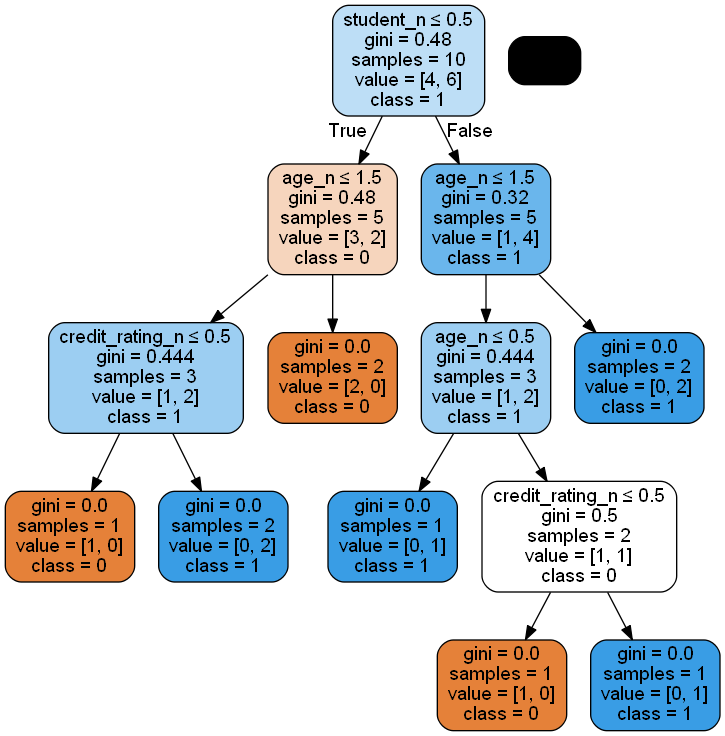

In [76]:
Image(graph.create_png())

In [77]:
path=clf1.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp_ give list of values",ccp_alphas)
print('------------------------------------')
print("impurities in decisition",impurities)

ccp_ give list of values [0.         0.05333333 0.10666667]
------------------------------------
impurities in decisition [0.   0.16 0.48]


In [78]:
cfls=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    cfls.append(clf)
    a=str(cfls[-1].tree_.node_count)
    b=str(ccp_alphas[-1])
print("last node in decission tree is%a and ccp_alpha value for last node is%b ",a,b)

last node in decission tree is%a and ccp_alpha value for last node is%b  1 0.10666666666666667


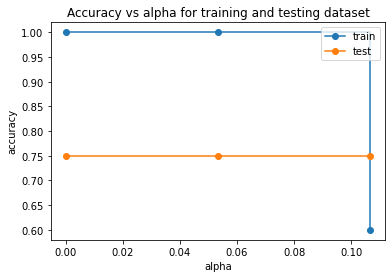

In [79]:
train_scores=[clf.score(x_train,y_train) for clf in cfls]
test_scores=[clf.score(x_test,y_test) for clf in cfls]
fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing dataset")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker="o",label='test',drawstyle='steps-post')
ax.legend()
plt.show()

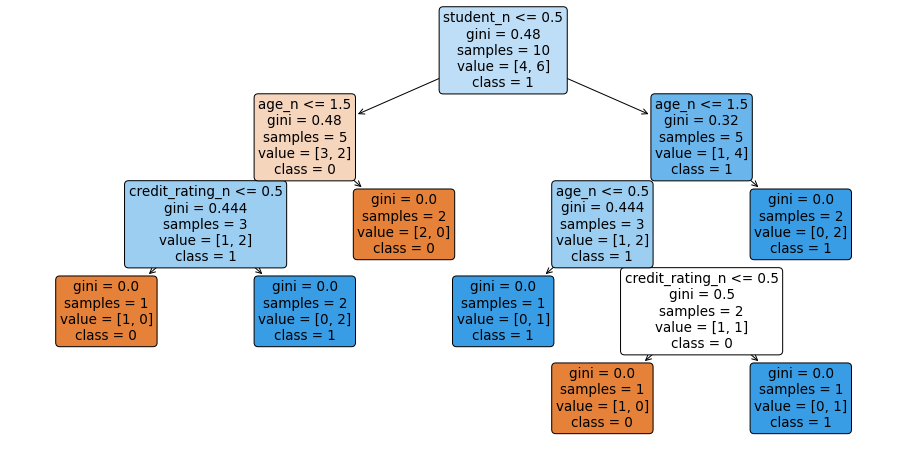

In [87]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=42,ccp_alpha=0.02)
clf.fit(x_train,y_train)
plt.figure(figsize=(16,8))
tree.plot_tree(clf,rounded=True,filled=True,feature_names=feature_cols,class_names=['0','1'])
plt.show()

In [85]:
tree.plot_tree?

In [89]:
metrics.accuracy_score(y_test,clf.predict(x_test))

0.75